In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import prep
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('prod_forecast.csv')

In [3]:
df

,ds,y,yhat1,residual1,trend,season_yearly
0,1991-01-01,2516.0,2635.878906,119.878906,3703.720215,-1067.841309
1,1992-01-01,2697.0,2659.555176,-37.444824,3741.814209,-1082.259155
2,1993-01-01,2793.0,2741.830078,-51.169922,3779.892578,-1038.062500
3,1994-01-01,2722.0,2761.707031,39.707031,3814.814453,-1053.107300
4,1995-01-01,2770.0,2782.930176,12.930176,3850.771484,-1067.841309
5,1996-01-01,2783.0,2817.660156,34.660156,3899.919189,-1082.259155
6,1997-01-01,2964.0,2888.722168,-75.277832,3926.784668,-1038.062500
7,1998-01-01,2955.0,2720.022949,-234.977051,3773.130127,-1053.107300
8,1999-01-01,2501.0,2537.539062,36.539062,3605.380615,-1067.841309
9,2000-01-01,2180.0,2272.632812,92.632812,3354.892090,-1082.259155


In [4]:
df = df.rename(columns={'yhat1':'production_prediction', 'ds': 'year'})

In [5]:
df.head()

,year,y,production_prediction,residual1,trend,season_yearly
0,1991-01-01,2516.0,2635.878906,119.878906,3703.720215,-1067.841309
1,1992-01-01,2697.0,2659.555176,-37.444824,3741.814209,-1082.259155
2,1993-01-01,2793.0,2741.830078,-51.169922,3779.892578,-1038.062500
3,1994-01-01,2722.0,2761.707031,39.707031,3814.814453,-1053.107300
4,1995-01-01,2770.0,2782.930176,12.930176,3850.771484,-1067.841309


In [6]:
df = df[['year','production_prediction']]

In [7]:
df = df.set_index('year')

# Create bollinger bands

In [8]:
# set the window span
span = 2

# compute midband
midband = df.ewm(span=span).mean()

midband.head()

,production_prediction
year,
1991-01-01,2635.878906
1992-01-01,2653.636108
1993-01-01,2714.693472
1994-01-01,2746.427625
1995-01-01,2770.863217


In [9]:
# compute exponential stdev
stdev = df.ewm(span=span).std()

stdev.head()


,production_prediction
year,
1991-01-01,NaN
1992-01-01,16.741651
1993-01-01,60.497919
1994-01-01,46.051894
1995-01-01,35.831459


In [10]:
# compute upper and lower bands
ub = midband + stdev*3
lb = midband - stdev*3
ub

,production_prediction
year,
1991-01-01,NaN
1992-01-01,2703.861061
1993-01-01,2896.187230
1994-01-01,2884.583307
1995-01-01,2878.357595
1996-01-01,2914.316754
1997-01-01,3044.835965
1998-01-01,3066.026218
1999-01-01,3103.593277


In [11]:
lb

,production_prediction
year,
1991-01-01,NaN
1992-01-01,2603.411156
1993-01-01,2533.199714
1994-01-01,2608.271943
1995-01-01,2663.368839
1996-01-01,2689.891307
1997-01-01,2674.915778
1998-01-01,2467.226537
1999-01-01,2124.194205


In [12]:
# concatenate ub and lb together into one df, bb
bb = pd.concat([ub, lb], axis=1)

bb.columns = ['ub', 'lb']
bb.head()


,ub,lb
year,,
1991-01-01,NaN,NaN
1992-01-01,2703.861061,2603.411156
1993-01-01,2896.187230,2533.199714
1994-01-01,2884.583307,2608.271943
1995-01-01,2878.357595,2663.368839


In [13]:
my_df = pd.concat([df.production_prediction, midband, bb], axis=1)
my_df.columns = ['production', 'midband', 'ub', 'lb']
my_df.head()

,production,midband,ub,lb
year,,,,
1991-01-01,2635.878906,2635.878906,NaN,NaN
1992-01-01,2659.555176,2653.636108,2703.861061,2603.411156
1993-01-01,2741.830078,2714.693472,2896.187230,2533.199714
1994-01-01,2761.707031,2746.427625,2884.583307,2608.271943
1995-01-01,2782.930176,2770.863217,2878.357595,2663.368839


In [14]:
my_df.index = df.index

In [15]:
my_df.index

Index(['1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
       '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
       '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
       '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
       '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
       '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01',
       '2022-01-01', '2023-01-01', '2024-01-01', '2025-01-01', '2026-01-01',
       '2027-01-01', '2028-01-01', '2029-01-01', '2030-01-01', '2031-01-01'],
      dtype='object', name='year')

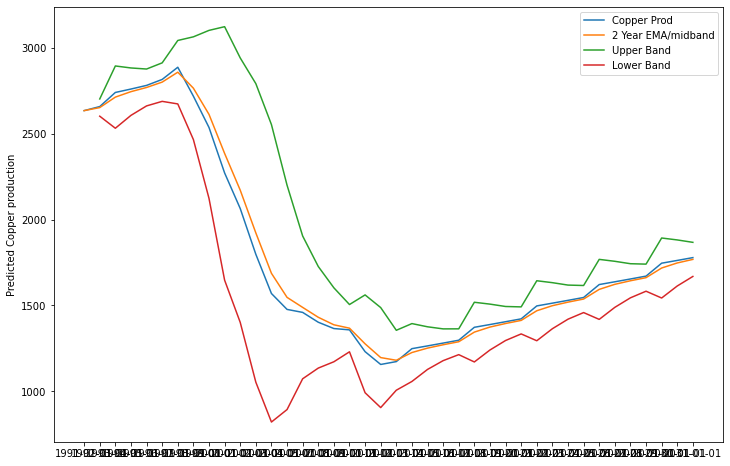

In [16]:
my_df.index = df.index
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(my_df.index, my_df.production, label='Copper Prod')

ax.plot(my_df.index, my_df.midband, label = '2 Year EMA/midband')
ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
ax.plot(my_df.index, my_df.lb, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Predicted Copper production')

plt.show()

In [24]:
my_df = my_df.round()

In [25]:
my_df.to_csv('prod_bol_bands.csv')

# Creating bands for vehicle predictions

In [54]:
monthly = pd.read_csv('vehicle_predictions.csv')

In [55]:
monthly.head()

,Unnamed: 0,0
0,2012-01-01,6033.703635
1,2012-02-01,6041.748220
2,2012-03-01,6180.962307
3,2012-04-01,6148.752098
4,2012-05-01,6187.497036


In [56]:
monthly = monthly.rename(columns={'0':'sales_prediction', 'Unnamed: 0': 'year'})

In [57]:
monthly.head()

,year,sales_prediction
0,2012-01-01,6033.703635
1,2012-02-01,6041.748220
2,2012-03-01,6180.962307
3,2012-04-01,6148.752098
4,2012-05-01,6187.497036


In [58]:
monthly = monthly.set_index('year')

In [59]:
# set the window span
span = 12

# compute midband
midband = monthly.ewm(span=span).mean()

midband.head()

,sales_prediction
year,
2012-01-01,6033.703635
2012-02-01,6038.061119
2012-03-01,6093.835485
2012-04-01,6111.170514
2012-05-01,6131.908157


In [60]:
# compute exponential stdev
stdev = monthly.ewm(span=span).std()

stdev.head()

,sales_prediction
year,
2012-01-01,NaN
2012-02-01,5.688380
2012-03-01,85.860117
2012-04-01,73.303710
2012-05-01,71.682123


In [61]:
# compute upper and lower bands
ub = midband + stdev*3
lb = midband - stdev*3
ub.head()

,sales_prediction
year,
2012-01-01,NaN
2012-02-01,6055.126260
2012-03-01,6351.415837
2012-04-01,6331.081644
2012-05-01,6346.954525


In [62]:
lb.head()

,sales_prediction
year,
2012-01-01,NaN
2012-02-01,6020.995977
2012-03-01,5836.255133
2012-04-01,5891.259384
2012-05-01,5916.861790


In [63]:
# concatenate ub and lb together into one df, bb
bb = pd.concat([ub, lb], axis=1)

bb.columns = ['ub', 'lb']
bb.head()

,ub,lb
year,,
2012-01-01,NaN,NaN
2012-02-01,6055.126260,6020.995977
2012-03-01,6351.415837,5836.255133
2012-04-01,6331.081644,5891.259384
2012-05-01,6346.954525,5916.861790


In [64]:
my_df = pd.concat([monthly.sales_prediction, midband, bb], axis=1)
my_df.columns = ['sales', 'midband', 'ub', 'lb']
my_df.head()

,sales,midband,ub,lb
year,,,,
2012-01-01,6033.703635,6033.703635,NaN,NaN
2012-02-01,6041.748220,6038.061119,6055.126260,6020.995977
2012-03-01,6180.962307,6093.835485,6351.415837,5836.255133
2012-04-01,6148.752098,6111.170514,6331.081644,5891.259384
2012-05-01,6187.497036,6131.908157,6346.954525,5916.861790


In [65]:
my_df.index = monthly.index

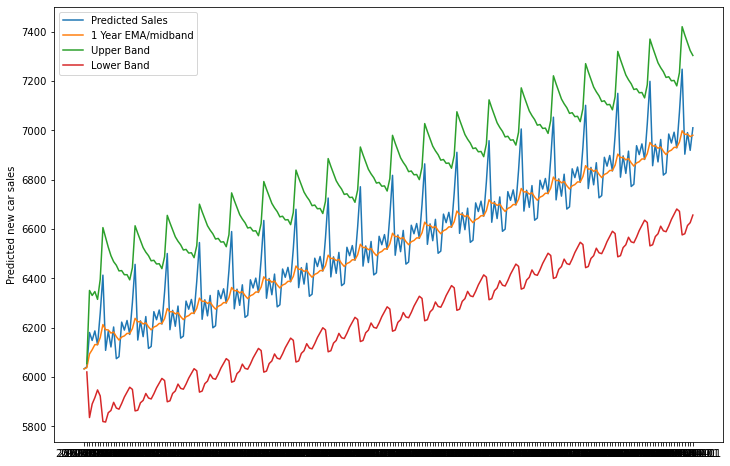

In [66]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(my_df.index, my_df.sales, label='Predicted Sales')

ax.plot(my_df.index, my_df.midband, label = '1 Year EMA/midband')
ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
ax.plot(my_df.index, my_df.lb, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Predicted new car sales')

plt.show()

In [67]:
my_df.round()

,sales,midband,ub,lb
year,,,,
2012-01-01,6034.0,6034.0,NaN,NaN
2012-02-01,6042.0,6038.0,6055.0,6021.0
2012-03-01,6181.0,6094.0,6351.0,5836.0
2012-04-01,6149.0,6111.0,6331.0,5891.0
2012-05-01,6187.0,6132.0,6347.0,5917.0
...,...,...,...,...
2030-08-01,7248.0,6999.0,7421.0,6577.0
2030-09-01,6904.0,6984.0,7387.0,6581.0
2030-10-01,6991.0,6985.0,7356.0,6615.0


In [38]:
my_df.to_csv('pred_sales_bands.csv')

# Bands for copper for cars allocation

In [39]:
cop_cars = pd.read_csv('copper_for_cars.csv')

In [40]:
cop_cars.head()

,ds,y,yhat1,residual1,trend,season_yearly
0,1991-01-01,402.56,410.043396,7.483396,-31.870132,441.913544
1,1992-01-01,431.52,422.313568,-9.206432,-17.246002,439.559570
2,1993-01-01,446.88,442.765320,-4.114680,-3.094162,445.859497
3,1994-01-01,435.52,441.974304,6.454304,-2.039764,444.014069
4,1995-01-01,443.20,442.015991,-1.184009,0.102448,441.913544


In [41]:
cop_cars = cop_cars.rename(columns={'yhat1':'production_prediction', 'ds': 'year'})

In [42]:
df = cop_cars[['year','production_prediction']]

In [43]:
df = df.set_index('year')

In [44]:
# set the window span
span = 2

# compute midband
midband = df.ewm(span=span).mean()

midband.head()

,production_prediction
year,
1991-01-01,410.043396
1992-01-01,419.246025
1993-01-01,435.528614
1994-01-01,439.879455
1995-01-01,441.309698


In [45]:
# compute exponential stdev
stdev = df.ewm(span=span).std()

stdev.head()

,production_prediction
year,
1991-01-01,NaN
1992-01-01,8.676322
1993-01-01,16.556660
1994-01-01,10.150943
1995-01-01,5.960345


In [46]:
# compute upper and lower bands
ub = midband + stdev*3
lb = midband - stdev*3
ub.head()

,production_prediction
year,
1991-01-01,NaN
1992-01-01,445.274991
1993-01-01,485.198592
1994-01-01,470.332284
1995-01-01,459.190733


In [47]:
lb.head()

,production_prediction
year,
1991-01-01,NaN
1992-01-01,393.217059
1993-01-01,385.858635
1994-01-01,409.426625
1995-01-01,423.428663


In [48]:
# concatenate ub and lb together into one df, bb
bb = pd.concat([ub, lb], axis=1)

bb.columns = ['ub', 'lb']
bb.head()

,ub,lb
year,,
1991-01-01,NaN,NaN
1992-01-01,445.274991,393.217059
1993-01-01,485.198592,385.858635
1994-01-01,470.332284,409.426625
1995-01-01,459.190733,423.428663


In [49]:
my_df = pd.concat([df.production_prediction, midband, bb], axis=1)
my_df.columns = ['production', 'midband', 'ub', 'lb']
my_df.head()

,production,midband,ub,lb
year,,,,
1991-01-01,410.043396,410.043396,NaN,NaN
1992-01-01,422.313568,419.246025,445.274991,393.217059
1993-01-01,442.765320,435.528614,485.198592,385.858635
1994-01-01,441.974304,439.879455,470.332284,409.426625
1995-01-01,442.015991,441.309698,459.190733,423.428663


In [50]:
my_df.index = df.index

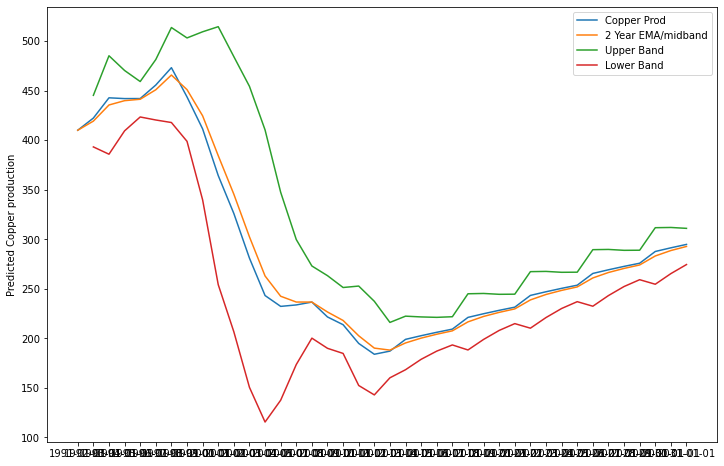

In [51]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(my_df.index, my_df.production, label='Copper Prod')

ax.plot(my_df.index, my_df.midband, label = '2 Year EMA/midband')
ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
ax.plot(my_df.index, my_df.lb, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Predicted Copper production')

plt.show()

In [52]:
my_df.round()

,production,midband,ub,lb
year,,,,
1991-01-01,410.0,410.0,NaN,NaN
1992-01-01,422.0,419.0,445.0,393.0
1993-01-01,443.0,436.0,485.0,386.0
1994-01-01,442.0,440.0,470.0,409.0
1995-01-01,442.0,441.0,459.0,423.0
1996-01-01,456.0,451.0,481.0,420.0
1997-01-01,473.0,466.0,514.0,418.0
1998-01-01,444.0,451.0,503.0,399.0
1999-01-01,411.0,425.0,509.0,340.0
